# Week 4 Workshop Assignment Notebook
`  `



---


## ENVIRONMENT SETUP
Before you run any cells in this Notebook, make sure that you have uploaded **momaviz.sql** via this Notebook's file browser. Refresh the file browser and make sure you see it there. Then, run the cells below, one by one. 

If afterward at any point, your connection to the runtime is lost, make sure once you re-connect that the **momaviz.sql** file still exists in the file browser. If it no longer exists, upload it again. If any of the green check marks are gone next to the code cells in this ENVIRONMENT SETUP section, start from the top and re-run all the cells in this section.

The code cells within the section for each task can be run independently of each other, as long as all ENVIRONMENT SETUP cells have been run. 

The following cell is used to install and start a Postgres server:

In [1]:
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../0-cron_3.0pl1-136ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-136ubuntu1) ...
Selecting previously unselected package logrotate.
Preparing to unpack .../1-logrotate_3.14.0-4ubuntu3_amd64.deb ...
Unpacking logrotate (3.14.0-4ubuntu3) ...
Selecting previously unselected package netbase.
Preparing to unpack .../2-netbase_6.1_all.deb ...
Unpacking netbase (6.1) ...
Selecting previously unselected package pos

The next two cells will drop the **moma** database on that Postgres server, if it exists, and create a new one:

In [2]:
!sudo -u postgres psql -c 'DROP DATABASE IF EXISTS moma;'

NOTICE:  database "moma" does not exist, skipping
DROP DATABASE


In [3]:
!sudo -u postgres psql -c 'CREATE DATABASE moma;'

CREATE DATABASE


Next, run the following cell to add data from moma_viz.sql to the moma database:

In [4]:
!sudo -u postgres psql moma < momaviz.sql

SET
SET
SET
SET
SET
 set_config 
------------
 
(1 row)

SET
SET
SET
SET
SET
CREATE TABLE
ALTER TABLE
CREATE SEQUENCE
ALTER TABLE
ALTER SEQUENCE
CREATE TABLE
ALTER TABLE
CREATE SEQUENCE
ALTER TABLE
ALTER SEQUENCE
ALTER TABLE
ALTER TABLE
COPY 408
COPY 539
 setval 
--------
  15222
(1 row)

 setval 
--------
 138151
(1 row)

ALTER TABLE
ALTER TABLE


Run the following cell to update the default password for the Postgres database:

In [5]:
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

ALTER ROLE


Finally, run the following cell to import the packages you'll use in this exercise, and open a database connection and cursor to the Postgres server with psycopg. You will see a UserWarning about the psycopg2 wheel package. You can ignore this warning, as long as you see a green check mark after running the cell.

In [6]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

conn = psycopg2.connect("dbname=moma user=postgres password=postgres host=localhost port=5432")
conn.set_session(autocommit=True)

cur = conn.cursor()

Run the following cell to make available the same sql_to_df function you have used in this week's exercises:

In [7]:
def sql_to_df(sql_query: str):
    """Get result set of sql_query as a pandas DataFrame."""
    return pd.read_sql(sql_query, conn)

`  `

---


## TASK 1 - ARTWORKS BY DEPARTMENT

Run the following cell to test the SQL query you devised in Task 1: Part 1. 
For this task, the query has been provided for you as an example, so you do not need to do anything except run the cell. And of course, examine the query and do your best to understand how it works!

In [8]:
# Task 1: Part 2 - Test your query

cur.execute(
    """
    SELECT department, COUNT(*)
    FROM moma_works
    GROUP BY department
    ORDER BY count DESC;
    """
)

works = cur.fetchall()
for w in works:
  print(w)

('Drawings & Prints', 294)
('Photography', 123)
('Architecture & Design', 78)
('Painting & Sculpture', 14)
('Fluxus Collection', 14)
('Media and Performance', 10)
('Film', 6)


Take the query (the part inside the multiline string (""" """) in the previous cell) and paste it inside the multiline string (""" """) in the next cell, then run it:

<ipython-input-7-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


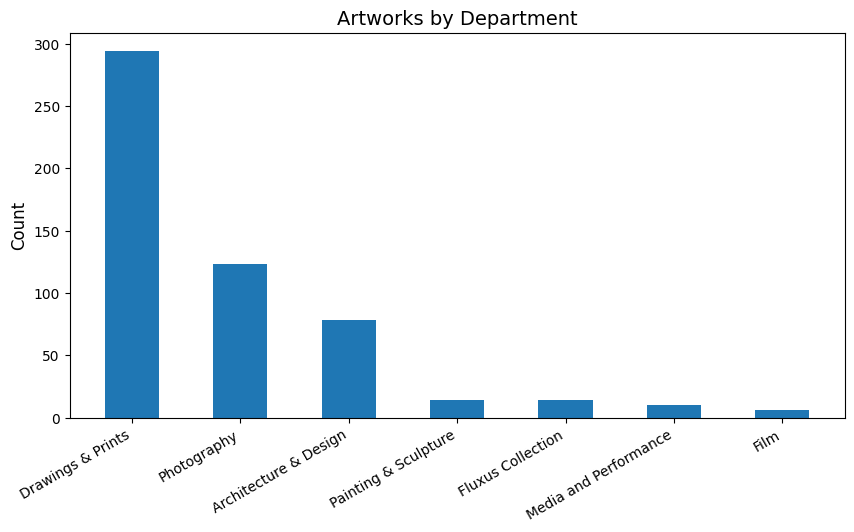

In [9]:
# Task 1: Part 3 - Data visualization

title = "Artworks by Department"
query = """
        SELECT department, COUNT(*)
        FROM moma_works
        GROUP BY department
        ORDER BY count DESC;
        """

dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

# get evenly spaced x-axis positions
xpos = np.arange(len(dataframe))
# at each x, add bar (height based on count data)
axes.bar(xpos, dataframe["count"], width=0.50)
# at each x, add tick mark
axes.set_xticks(xpos)
# at each x, add label based on dept data
axes.set_xticklabels(dataframe["department"])
# label y-axis
axes.set_ylabel("Count", fontsize=12)
# rotate x-axis labels to prevent overlap
plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

`  `

---
## TASK 2 - ARTISTS BY CLASSIFICATION

Task 2: Part 1 in the workshop assignment instructions provides you with a description of an SQL query to construct.
Once you are ready to test your query, enter it inside the multiline string of the code cell below, and run it. 

In [10]:
# Task 2: Part 2 - Test your query

cur.execute(
    """
     SELECT classification, COUNT(*)
     FROM moma_works
     GROUP BY classification
     ORDER BY count DESC;
    """
)

works = cur.fetchall()
for w in works:
  print(w)

('Photograph', 130)
('Print', 128)
('Illustrated Book', 108)
('Design', 47)
('Drawing', 45)
('Mies van der Rohe Archive', 14)
('Architecture', 13)
('Video', 9)
('Sculpture', 8)
('Painting', 8)
('Audio', 8)
('Film', 5)
('Frank Lloyd Wright Archive', 4)
('Periodical', 3)
('Multiple', 3)
('(not assigned)', 2)
('Ephemera', 2)
('Software', 1)
('Work on Paper', 1)


<ipython-input-7-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


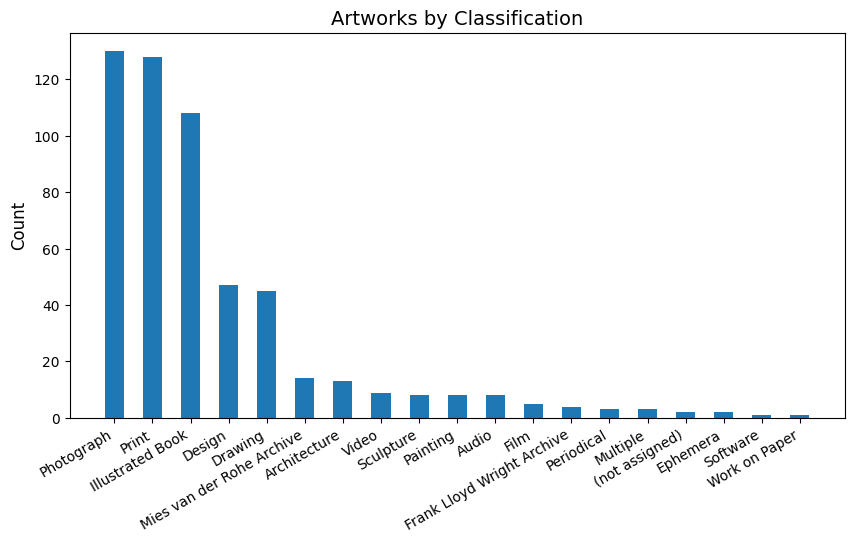

In [11]:
# Task 2: Part 3 - Data visualization

title = "Artworks by Classification"
query = """
        SELECT classification, COUNT(*)
        FROM moma_works
        GROUP BY classification
        ORDER BY count DESC;
        """

dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

xpos = np.arange(len(dataframe))
axes.bar(xpos, dataframe["count"], width=0.50)
axes.set_xticks(xpos)
axes.set_xticklabels(dataframe["classification"])
axes.set_ylabel("Count", fontsize=12)
plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.show()

`  `

---
## TASK 3 - ARTISTS BY NATIONALITY

In [50]:
# Task 3: Part 2 - Test your query

cur.execute(
    """
    SELECT info ->> 'nationality' AS nationality, COUNT(*)
    FROM moma_artists
    WHERE info ->> 'nationality' <> 'None'
    GROUP BY nationality
    ORDER BY COUNT(*) DESC
    LIMIT 10;
    """
)

artists = cur.fetchall()
for a in artists:
  print(a)

('American', 175)
('French', 48)
('German', 31)
('British', 22)
('Russian', 15)
('Italian', 14)
('Japanese', 9)
('Mexican', 8)
('Dutch', 7)
('Spanish', 7)


<ipython-input-7-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


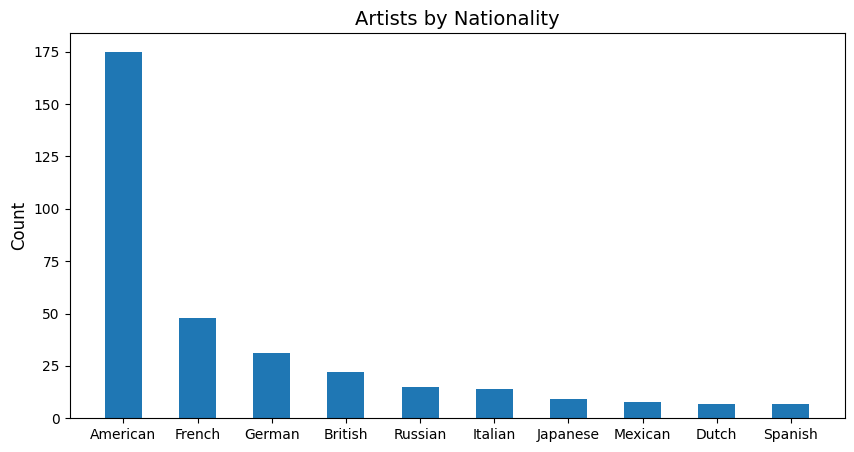

In [49]:
# Task 3: Part 3 - Data visualization

title = "Artists by Nationality"
query = """
        SELECT info ->> 'nationality' AS nationality, COUNT(*)
        FROM moma_artists
        WHERE info ->> 'nationality' <> 'None'
        GROUP BY nationality
        ORDER BY COUNT(*) DESC
        LIMIT 10;
        """

dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

xpos = np.arange(len(dataframe))
axes.bar(xpos, dataframe["count"], width=0.50)
axes.set_xticks(xpos)
axes.set_xticklabels(dataframe["nationality"])
axes.set_ylabel("Count", fontsize=12)

plt.show()

`  `

---
## TASK 4 - ARTISTS BY GENDER

In [51]:
# Task 4: Part 2 - Test your query

cur.execute(
    """
        SELECT info ->> 'gender' AS gender, COUNT(*)
        FROM moma_artists
        WHERE info ->> 'gender' <> 'None'
        GROUP BY gender
        ORDER BY gender;
    """
)

artists = cur.fetchall()
for a in artists:
  print(a)

('Female', 53)
('Male', 309)


<ipython-input-7-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


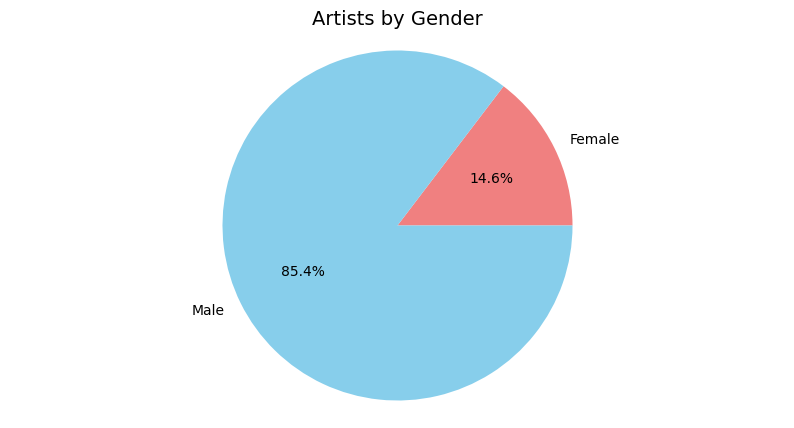

In [52]:
# Task 4: Part 3 - Data visualization

title = "Artists by Gender"
query = """
        SELECT info ->> 'gender' AS gender, COUNT(*)
        FROM moma_artists
        WHERE info ->> 'gender' <> 'None'
        GROUP BY gender
        ORDER BY gender;
        """

dataframe = sql_to_df(query)
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

fig.set_facecolor('white')
axes.pie(
    x=dataframe["count"],
    labels=dataframe["gender"],
    autopct='%1.1f%%',
    colors=['lightcoral', 'skyblue', 'lavender']
)
# Equal aspect ratio ensures that pie is drawn as a circle.
axes.axis('equal')

plt.show()

`  `

---
## TASK 5 - BONUS

This is an optional task. For this task, the code has been completed for you. Your task is to run the cell, examine the SQL query and the results, and come up with an appropriate title and assign it to the value of the title variable. You can compare it with the solution shown in the bonus task instructions. 

<ipython-input-7-c628324adf36>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql_query, conn)


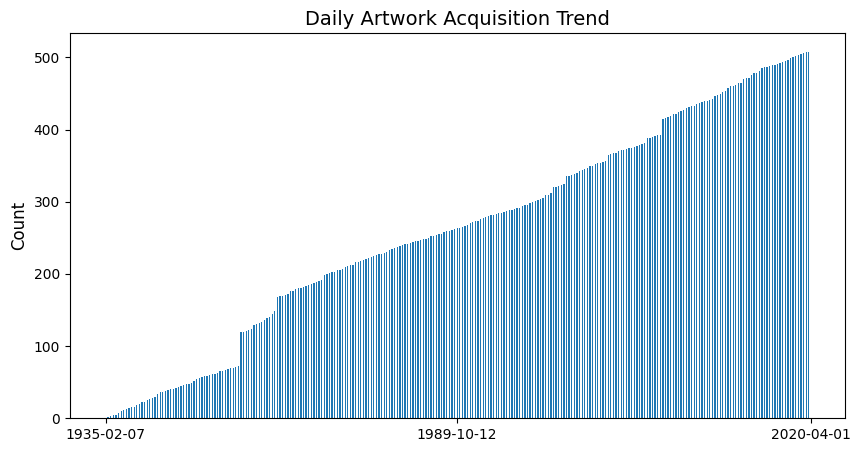

In [48]:
# BONUS TASK 5

title = "Daily Artwork Acquisition Trend"
query = """
        WITH daily_acquisition_count AS (
            SELECT date_acquired, COUNT(*) FROM moma_works 
            WHERE date_acquired IS NOT NULL 
            GROUP BY date_acquired
        )
        SELECT date_acquired, SUM(count) 
        OVER (ORDER BY date_acquired) FROM daily_acquisition_count;
        """
dataframe = sql_to_df(query)
_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

xpos = np.arange(len(dataframe))
axes.bar(xpos, dataframe["sum"], width=0.50)
axes.set_xticks([
    0,
    len(dataframe) // 2,
    len(dataframe)
])
axes.set_xticklabels(dataframe.iloc[[
    0,
    len(dataframe) // 2,
    -1
]]["date_acquired"])
axes.set_ylabel("Count", fontsize=12)

plt.show()

`  `



---

## SUBMISSION
Once all non-bonus tasks are completed, download the .py version of this Notebook to your computer by going to **File > Download > Download .py**. Submit the downloaded **moma_viz.py** file in the learning portal.